In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#feature selection
from sklearn.feature_selection import f_classif as fs
from sklearn.preprocessing import LabelEncoder

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import  StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, roc_auc_score,roc_curve
from sklearn.metrics import classification_report,confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import neighbors


import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('bankchurn.csv')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.duplicated().sum()

0

In [4]:
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
data.shape

(10000, 13)

In [7]:
data.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
data.Geography.unique()

array(['France', 'Spain', 'espanio', 'fra', 'Germany', 'france', 'ger',
       'spain', 'germany', 'gernamy', 'GERMANY'], dtype=object)

In [9]:
data.Geography=data.Geography.replace({'fra':'France','france':'France',
                                       'ger':'Germany','germany':'Germany','GERMANY':'Germany','gernamy':'Germany',
                                       'espanio':'Spain','spain':'Spain'})

[Text(0.5, 1.0, 'Balance')]

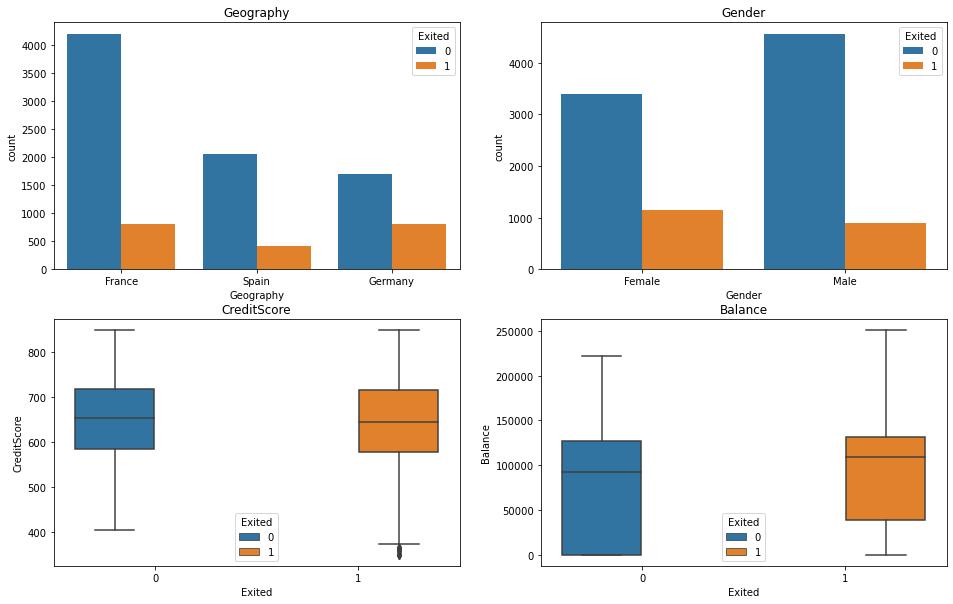

In [10]:
fig, ax = plt.subplots(2,2, figsize= (16,10))
sns.countplot(x='Geography', hue='Exited', data=data, ax= ax[0,0]).set(title='Geography')

sns.countplot(x='Gender', hue='Exited', data=data, ax= ax[0,1]).set(title='Gender')

sns.boxplot(y='CreditScore',x='Exited', hue='Exited', data=data, ax= ax[1,0]).set(title='CreditScore')

sns.boxplot(y='Balance',x='Exited', hue='Exited', data=data, ax= ax[1,1]).set(title='Balance')

In [11]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
#Germany people leave
#more females to leave
#active member 0 more to leave
#has crcard more to leave

Most of the customers were from France who stayed.
We lose customers from Germany Usually.
Customers who stayed are mostly male.
Customers who were not active members have more chances to leave.
Usually customers who have Credit card have more chances to stay but its not necessary as over 1100 customers have left who had a credit card.

In [13]:
def pie(data,column):    
    fig, ax = plt.subplots(1,1, figsize = (6, 5))
    data = column.value_counts()                                                                                        
    labels =data.keys()   
    plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5);
    plt.title(column.name)

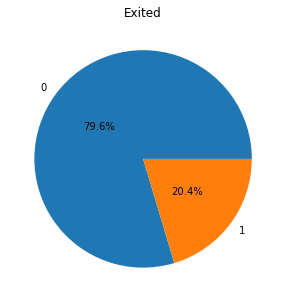

In [14]:
pie(data,data.Exited)

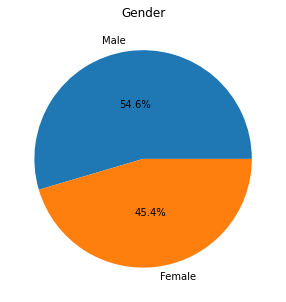

In [15]:
pie(data,data.Gender)

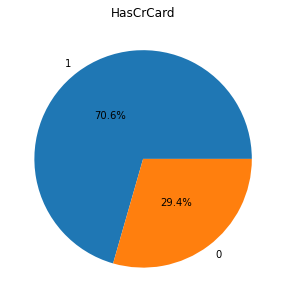

In [16]:
pie(data,data.HasCrCard)

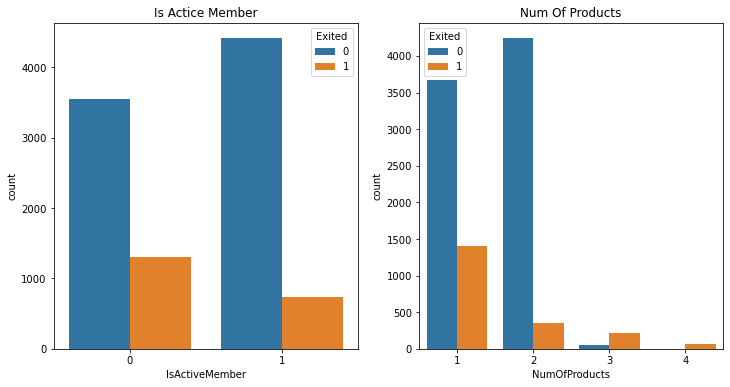

In [17]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(x='NumOfProducts', hue='Exited', data=data, ax= ax[1]).set(title='Num Of Products');

sns.countplot(x='IsActiveMember', hue='Exited', data=data, ax= ax[0]).set(title='Is Actice Member');


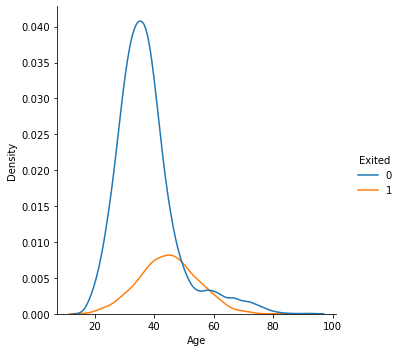

In [18]:
sns.displot(data=data,x='Age',hue='Exited',kind='kde');


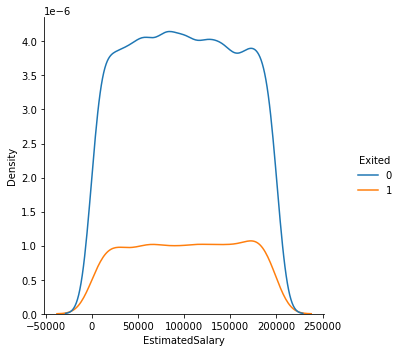

In [19]:
sns.displot(data=data,x='EstimatedSalary',hue='Exited',kind='kde');

[Text(0.5, 1.0, 'Balance')]

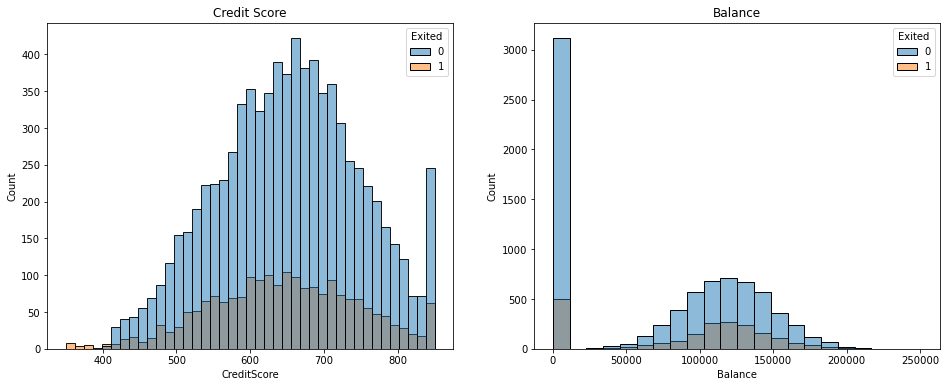

In [20]:
fig, ax = plt.subplots(1,2, figsize= (16,6))
sns.histplot(x='CreditScore', hue='Exited', data=data, ax= ax[0]).set(title='Credit Score')

sns.histplot(x='Balance', hue='Exited', data=data, ax= ax[1]).set(title='Balance')

In [21]:
data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [22]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
#Feature selection
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data.Geography=le.fit_transform(data.Geography)

In [24]:
#geature selection
trainx=data.drop(['Exited'],axis=1)
trainy=data['Exited']


In [25]:
fscore,pvalue=fs(trainx,trainy)

In [26]:
df=pd.DataFrame({'feature':trainx.columns,'score':fscore,'pvalue':pvalue})
df=df.sort_values('score',ascending=False)
df

,feature,score,pvalue
3,Age,886.063275,1.239931e-186
8,IsActiveMember,249.800794,1.348269e-55
5,Balance,142.473832,1.275563e-32
2,Gender,114.727989,1.258505e-26
6,NumOfProducts,22.915223,1.717333e-06
1,Geography,12.933084,3.243820e-04
0,CreditScore,7.344522,6.738214e-03
4,Tenure,1.960164,1.615268e-01
9,EstimatedSalary,1.463262,2.264404e-01
7,HasCrCard,0.509401,4.754149e-01


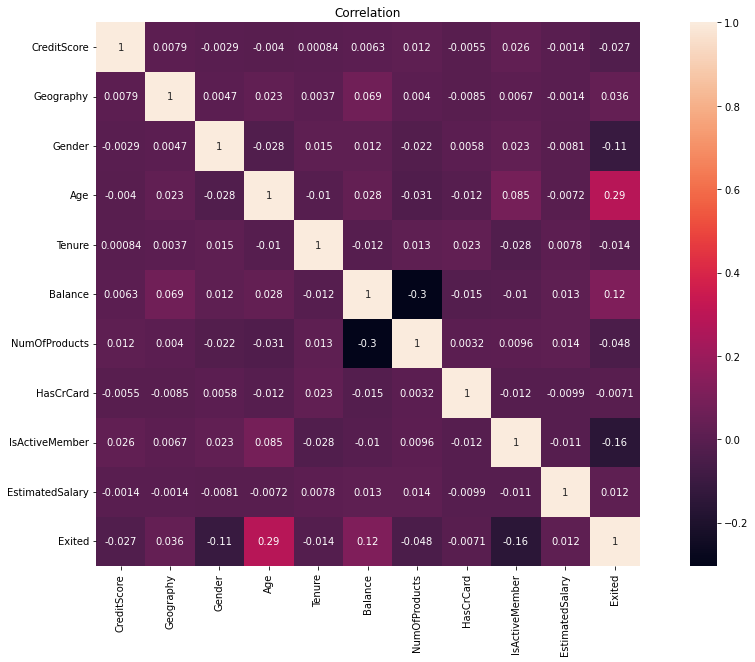

In [27]:
corrmat = data.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corrmat, annot=True, square=True)
plt.title('Correlation');

In [28]:
df1=data[['Age','IsActiveMember','Balance','Gender','Exited']]
df1

,Age,IsActiveMember,Balance,Gender,Exited
0,42,1,0.00,0,1
1,41,1,83807.86,0,0
2,42,0,159660.80,0,1
3,39,0,0.00,0,0
4,43,1,125510.82,0,0
...,...,...,...,...,...
9995,39,0,0.00,1,0
9996,35,1,57369.61,1,0
9997,36,1,0.00,0,1
9998,42,0,75075.31,1,1


In [29]:
lst=['Balance','Age']
scale=MinMaxScaler()
df1[lst]=scale.fit_transform(df1[lst])

In [30]:
df1 = pd.get_dummies(df1, columns=['IsActiveMember','Gender'])
df1

,Age,Balance,Exited,IsActiveMember_0,IsActiveMember_1,Gender_0,Gender_1
0,0.324324,0.000000,1,0,1,1,0
1,0.310811,0.334031,0,0,1,1,0
2,0.324324,0.636357,1,1,0,1,0
3,0.283784,0.000000,0,1,0,1,0
4,0.337838,0.500246,0,0,1,1,0
...,...,...,...,...,...,...,...
9995,0.283784,0.000000,0,1,0,0,1
9996,0.229730,0.228657,0,0,1,0,1
9997,0.243243,0.000000,1,0,1,1,0
9998,0.324324,0.299226,1,1,0,0,1


#### Model Building

In [31]:
X=np.array(df1.loc[:,df1.columns !='Exited']).reshape((-1,6))
y=np.array(df1['Exited']).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
acc=[];accc=[];f1=[];f1cv=[];name=[]

#### Logistic Regression

In [77]:
modellr = LogisticRegression().fit(X_train, y_train)
scorelr=round(modellr.score(X_train, y_train)*100,2)#accuracy
y_predlr =modellr.predict(X_test)
scorelrt=round(modellr.score(X_test, y_test)*100,2)#accuracy
print(scorelr)
print(scorelrt)

80.3
81.4


In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

acc.append(accuracy_score(y_test, y_predlr).round(4))
f1.append(f1_score(y_test, y_predlr).round(4))


In [35]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
f1cv.append(cross_val_score(LogisticRegression(), X, y, cv= kf, scoring="f1").mean().round(4))

In [36]:
accc.append(cross_val_score(LogisticRegression(), X, y, cv= kf, scoring="accuracy").mean().round(4))

In [37]:
name.append('Logistic Regression')

### Naive Bayes

In [38]:
nb = GaussianNB().fit(X_train, y_train)
scorenb=round(nb.score(X_train, y_train)*100,2)#accuracy
y_prednb =nb.predict(X_test)


In [39]:
acc.append(accuracy_score(y_test, y_prednb).round(4))
f1.append(f1_score(y_test, y_prednb).round(4))


In [40]:
f1cv.append(cross_val_score(GaussianNB(), X, y, cv= kf, scoring="f1").mean().round(4))

In [41]:
accc.append(cross_val_score(GaussianNB(), X, y, cv= kf, scoring="accuracy").mean().round(4))

In [42]:
name.append('Naive Bayes')

#### Decision tree classifier

In [43]:
dtm = DecisionTreeClassifier(max_depth=6,min_samples_split=5,max_leaf_nodes=10)

dtm1=dtm.fit(X_train,y_train)
scoredtr=dtm1.score(X_train,y_train).round(4)
scoredt=dtm1.score(X_test,y_test).round(4)

y_pred_dt=dtm1.predict(X_test)


In [44]:
acc.append(accuracy_score(y_test, y_pred_dt).round(4))
f1.append(f1_score(y_test, y_pred_dt).round(4))


In [45]:
#cross-validate
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(DecisionTreeClassifier(max_depth= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'For max depth: {val}')
    print('Score: ',score.mean().round(4))

For max depth: 1
Score:  0.7963
For max depth: 2
Score:  0.8215
For max depth: 3
Score:  0.8253
For max depth: 4
Score:  0.8297
For max depth: 5
Score:  0.8297
For max depth: 6
Score:  0.8301
For max depth: 7
Score:  0.8284
For max depth: 8
Score:  0.825
For max depth: 9
Score:  0.8199
For max depth: 10
Score:  0.8185


In [46]:
accc.append(cross_val_score(DecisionTreeClassifier(max_depth= 6, random_state= 42), X, y, cv= kf, scoring="accuracy").mean().round(4))

In [47]:
#cross-validate
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(DecisionTreeClassifier(max_depth= val, random_state= 42), X, y, cv= kf, scoring="f1")
    print(f'For max depth: {val}')
    print('Score: ',score.mean().round(4))

For max depth: 1
Score:  0.0
For max depth: 2
Score:  0.4589
For max depth: 3
Score:  0.3348
For max depth: 4
Score:  0.4145
For max depth: 5
Score:  0.3984
For max depth: 6
Score:  0.4141
For max depth: 7
Score:  0.4274
For max depth: 8
Score:  0.4321
For max depth: 9
Score:  0.4189
For max depth: 10
Score:  0.4303


In [48]:
f1cv.append(cross_val_score(DecisionTreeClassifier(max_depth= val, random_state= 42), X, y, cv= kf, scoring="f1").mean().round(4))
name.append('Decision Tree')

#### Random forest classifier

In [49]:
modelrf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=4, n_estimators=100, oob_score=True).fit(X_train, y_train)
scorer=modelrf.score(X_train,y_train).round(3)*100
y_predr=modelrf.predict(X_test)

In [50]:
acc.append(accuracy_score(y_test, y_predr).round(4))
f1.append(f1_score(y_test, y_predr).round(4))

In [51]:
#cross-validate
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(RandomForestClassifier(max_depth= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'For max depth: {val}')
    print('Score: ',score.mean().round(4))

For max depth: 1
Score:  0.7963
For max depth: 2
Score:  0.7963
For max depth: 3
Score:  0.835
For max depth: 4
Score:  0.8343
For max depth: 5
Score:  0.8342
For max depth: 6
Score:  0.8338
For max depth: 7
Score:  0.8326
For max depth: 8
Score:  0.8308
For max depth: 9
Score:  0.8284
For max depth: 10
Score:  0.8261


In [52]:
accc.append(cross_val_score(RandomForestClassifier(max_depth=4, random_state= 42), X, y, cv= kf, scoring="accuracy").mean().round(4))


In [53]:
#cross-validate
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(RandomForestClassifier(max_depth= val, random_state= 42), X, y, cv= kf, scoring="f1")
    print(f'For max depth: {val}')
    print('Score: ',score.mean().round(4))

For max depth: 1
Score:  0.0
For max depth: 2
Score:  0.0
For max depth: 3
Score:  0.413
For max depth: 4
Score:  0.427
For max depth: 5
Score:  0.428
For max depth: 6
Score:  0.4236
For max depth: 7
Score:  0.4252
For max depth: 8
Score:  0.4239
For max depth: 9
Score:  0.4223
For max depth: 10
Score:  0.425


In [54]:
f1cv.append(cross_val_score(RandomForestClassifier(max_depth= val, random_state= 42), X, y, cv= kf, scoring="f1").mean().round(4))
name.append('Random Forest')

### Boosting with AdaBoost

In [55]:
modelab = AdaBoostClassifier(random_state=42).fit(X_train, y_train)
scoreab=modelab.score(X_test,y_test).round(3)*100
y_predab=modelab.predict(X_test)

In [56]:
acc.append(accuracy_score(y_test, y_predab).round(4))
f1.append(f1_score(y_test, y_predab).round(4))

In [57]:
#cross-validate
accc.append(cross_val_score(modelab, X,y, scoring='accuracy', n_jobs=-1,cv=kf,error_score='raise').mean().round(2))


In [58]:
f1cv.append(cross_val_score(modelab, X,y, scoring='f1', n_jobs=-1,cv=kf,error_score='raise').mean().round(2))
name.append('AdaBoost')


In [82]:
print(confusion_matrix(y_test,y_predab))

print(classification_report(y_test, y_predab))

[[2315  101]
 [ 374  210]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2416
           1       0.68      0.36      0.47       584

    accuracy                           0.84      3000
   macro avg       0.77      0.66      0.69      3000
weighted avg       0.82      0.84      0.82      3000



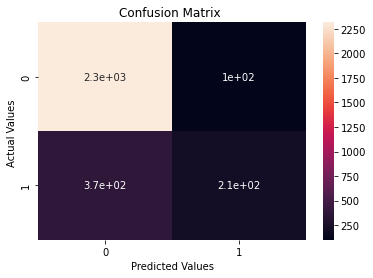

In [95]:
a=confusion_matrix(y_test,y_predab)
ax=sns.heatmap(a, annot=True);

ax.set_title('Confusion Matrix ');
ax.set_xlabel('Predicted Values');
ax.set_ylabel('Actual Values ');

In [97]:
y_test.shape

(3000, 1)

In [105]:
a=y_predab.reshape(-1,1)
a.shape

(3000, 1)

In [107]:
pd.crosstab(y_test, a,margins=False)

KeyboardInterrupt: 

### KNN

Minimum error:- 0.24453777777777777 at K = 2


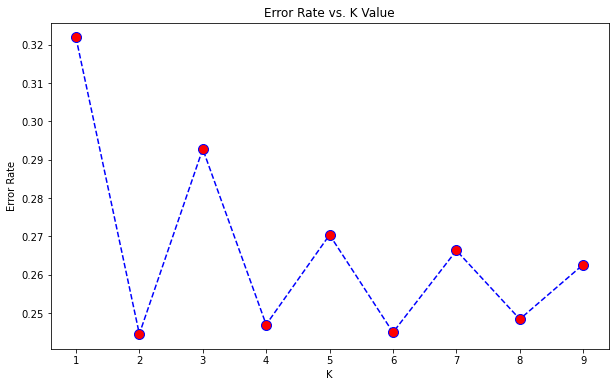

In [59]:
import matplotlib.pyplot as plt
error_rate = []
for i in range(1,10):
    clf1 = neighbors.KNeighborsClassifier(n_neighbors=i)
    clf1.fit(X_train,y_train)
    pred_i = clf1.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [60]:

clf = neighbors.KNeighborsClassifier(2).fit(X_train,y_train)
scoreknn=clf.score(X_test,y_test).round(3)*100
y_predknn=clf.predict(X_test)

In [61]:
acc.append(accuracy_score(y_test, y_predknn).round(4))
f1.append(f1_score(y_test, y_predknn).round(4))

In [62]:
f1cv.append(cross_val_score(clf, X,y, scoring='f1', n_jobs=-1,cv=kf,error_score='raise').mean().round(2))


In [63]:
accc.append(cross_val_score(clf, X,y, scoring='accuracy', n_jobs=-1,cv=kf,error_score='raise').mean().round(2))


In [64]:
name.append('knn')

In [65]:
f1cv

[0.2532, 0.3561, 0.4303, 0.425, 0.45, 0.31]

In [66]:
final_f1=pd.DataFrame(list(zip(name,f1,f1cv)),columns=['Algorithm','f1-score','CV']).set_index('Algorithm').sort_values(by='f1-score',ascending=False)
final_acc=pd.DataFrame(list(zip(name,acc,accc)),columns=['Algorithm','Accuracy','CV']).set_index('Algorithm').sort_values(by='Accuracy',ascending=False)
#final_cv=pd.DataFrame(list(zip(names,cv)),columns=['Algorithm','Cross_Validation']).set_index('Algorithm').sort_values(by='Cross_Validation',ascending=False)

In [67]:
final_f1

,f1-score,CV
Algorithm,,
AdaBoost,0.4693,0.4500
Decision Tree,0.4422,0.4303
Random Forest,0.4286,0.4250
Naive Bayes,0.3345,0.3561
knn,0.3209,0.3100
Logistic Regression,0.2398,0.2532


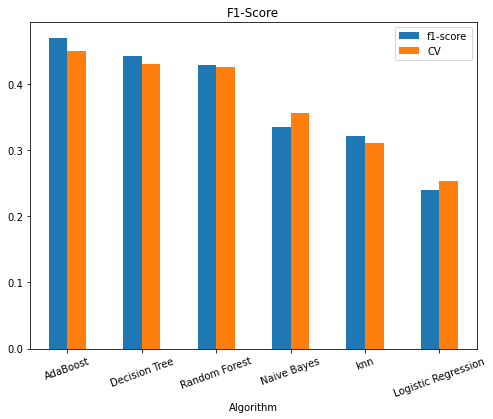

In [68]:
final_f1.plot(kind='bar',figsize=(8,6))
plt.xticks(rotation = 20);
plt.title('F1-Score');

In [69]:
final_acc

,Accuracy,CV
Algorithm,,
Random Forest,0.8427,0.8343
AdaBoost,0.8417,0.8300
Decision Tree,0.8377,0.8301
Logistic Regression,0.8140,0.8066
knn,0.8123,0.8100
Naive Bayes,0.8063,0.8066


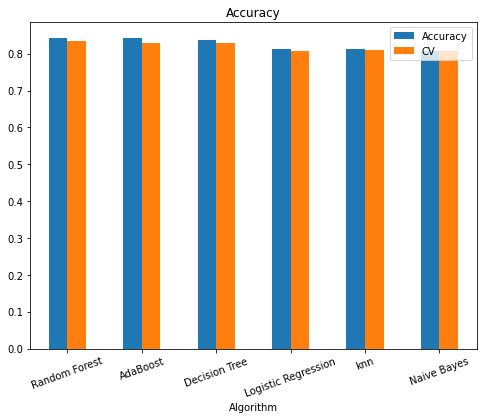

In [70]:
final_acc.plot(kind='bar',figsize=(8,6))
plt.xticks(rotation = 20);
plt.title('Accuracy');

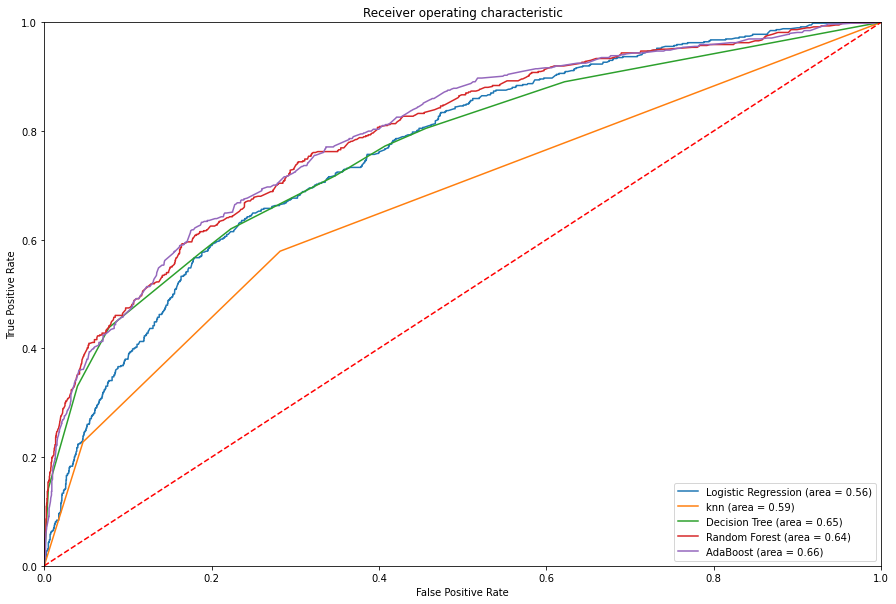

In [83]:
logistic_roc_auc = roc_auc_score(y_test, modellr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, modellr.predict_proba(X_test)[:,1])

knn_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

d_roc_auc = roc_auc_score(y_test, dtm.predict(X_test))
d_fpr, d_tpr, d_thresholds = roc_curve(y_test, dtm.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, modelrf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, modelrf.predict_proba(X_test)[:,1])

ab_roc_auc = roc_auc_score(y_test, modelab.predict(X_test))
ab_fpr, ab_tpr, ab_thresholds = roc_curve(y_test, modelab.predict_proba(X_test)[:,1])

fig.set_size_inches(25, 15)
plt.figure(figsize=(15,10))

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='knn (area = %0.2f)' % knn_roc_auc)
plt.plot(d_fpr, d_tpr, label='Decision Tree (area = %0.2f)' % d_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(ab_fpr, ab_tpr, label='AdaBoost (area = %0.2f)' % ab_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()